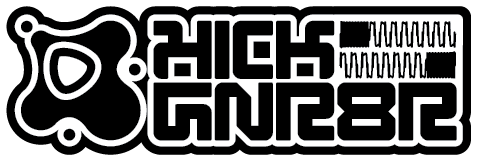

# ☢  DIGITAL WARFARE - KICK-GNR8R  ☢


**DIGITAL WARFARE** - ***DIGITALLY DISTORTED DATA DESIGNED TO DESTROY THE DANCE MUSIC INDUSTRY***

---

KICK-GNR8R_**GNR8** is a machine learning algorithm designed to generate Hardstyle Kicks from previously trained checkpoint files. The CKPT file provided was trained on over 1500 Hard Dance kicks from various genres spanning Rawstyle to Reverse bass.

It is an extremely powerful tool for producers to generate absolutely unique professional sounding Kickdrums. The days of ripping kicks are over.
This tool is not intended for replacing the traditional process of sound design and kick production, but rather as a companion to streamline the process by generating samples which can be refined layered, and elaborated as most kicks are done today. You can even train a CKPT with your own dataset!


Input your CHECKPOINT file that you created in [KICK_GNR8R_**TRaiNR**](https://colab.research.google.com/drive/1FkGcp0_xDHbb6Xi9BAoEDqaqwtG5twMf?usp=sharing)

---

**Audio diffusion tools in this notebook**:

- KICK GNR8R
>  Unconditional (random) Kick sample Generator
- R3GNR8R
> Audio Sample Regenerator / Style Transfer using 2 input Samples
- INTERPOL8R
> Interpolation between 2 audio files to blend them in a specified number of steps
---

# **INSTRUCTIONS** 📖 ℹ



## PREREQUISITES
- Sign up for free Gmail account and connect Google Drive
- Purchase a Google Colab Subscription (100 kicks = ~$10) to access Nvidia A100 GPUs
- Run 'Setup' Section to check GPU, prep drive, and install dependencies
- Select the model CKPT you trained using [KICK_GNR8R_**TRaiNR**](https://colab.research.google.com/drive/1FkGcp0_xDHbb6Xi9BAoEDqaqwtG5twMf?usp=sharing)
- Select Sampler type, and adjust settings.
- Optionaly, check the `save_to_wandb` option [Weights & Biases](https://www.wandb.ai/site) to track performance, versions, and create data analysis on your runs.
---
## - KICK-GNR8R -
---
## GENERATE RANDOM KICKS
- Select desired quantity of samples to generate
- Select appropriate sampler steps for the generator
- Run the [GNR8R Cell](https://colab.research.google.com/drive/1FKGY9U91q0njtIpOLIcoJ11dP8fbTOv3#scrollTo=_GQK9yZHTr_z&line=1&uniqifier=1) to generate samples

---
## - R3GENER8R -


> ## LAYER & MIX
- Record a file, enter the path to an audio file you want to regenerate, or upload a file when prompted


> ## INTERPOL8R
- Enter the paths to two audio files you want to interpolate between, or upload them when prompted
- Make sure the "skip_for_run_all" checkbox is unchecked
- Run the cell under the "Interpolate between sounds" header

> ## STYLE TRANSFER
- Enter a path to save your audio recordings
- Enter the number of audio recordings you want to combine into one
- Run the cell under the "Regenerate your own sound from the recording" header
- Make sure the "skip_for_run_all" checkbox is unchecked

## **LICENSE AND TERMS**

Licensed under the CC-1.0 LICENSE

Copyright (c) 2023 Digital Warfare

---

This software and all data contained herewithin is property of "Digital Warfare", you may not copy, modify, merge, publish, distribute, sublicense, and/or sell any portion of this software unless with prior written permission from "Digital Warfare"

Permission is hereby granted to any person obtaining a copy of this software and associated documentation files (the "Software"), to operate the Software to generate novel audio files, including without limitation, the rights to use, copy, modify, publish, distribute, sublicense, and/or sell the data produced by this software herewithin in their own productions, and to permit persons to whom the data produced by the Software is furnished to do so, subject to the following conditions:

---

- Under no circumstance shall the user disclose the source of generated audio files whereof, or existence of (the "Software") in question.

- By accessing the Software, the user agrees to participate in a private beta test of the Software and use the Software to train an AI using their own datasets. The user's uploaded data may be collected for research purposes in accordance with EU Regulation 6637/19 - 2016/0280(COD) and may be used to refine future versions of the Software. 

- ("the Owner") of the Software ('Digital Warfare") shall not create datasets or products from the user's data for commercial purposes or public release without the explicit consent and a royalty contract with the user. The owner shall not publicly reveal any information about any beta tester or the sources of the data used in any dataset without the user's consent.

- By using the Software, the user agrees that their data may be collected and used to refine future versions of the Software. Due to the nature of artificial intelligence, it is not possible to reverse engineer a checkpoint file to its source files, and thus the user's source code will remain safe. The Software requires high-quality data in order to produce the best results.

- Users must use utmost discretion and secrecy if disclosing the nature of (the "Software") as it has the potential to disrupt the status quo of the industry to which the audio files pertain.

- The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

---

You have the right to use this software to generate novel audio files and use, copy, modify, merge, publish, distribute, sublicense, and sell the audio data produced by the software in your own productions. You can also give others permission to use the audio data prduced by the software. The software is provided "as is" and without warranty. The authors and copyright holders are not liable for any claims, damages, or other liability arising from the use of the software. The person or entity using the software has the right to assert ownership over the data generated by the software, including audio files, checkpoints, datasets, and other data. This data is considered the property of the person or entity using the software and can be used in any manner, including creating songs, publications, and performances, and asserting copyright. By using the software, you agree to the terms and conditions.

---

By using this Software, the user agrees to these terms

Copyright (c) 2022 Digital Warfare





# **SETUP** 🚛
RUN ALL IN THIS SECTION BEFORE GENERATING

In [1]:
#@title CHECK GPU STATUS
import subprocess
simple_nvidia_smi_display = True#@param {type:"boolean"}
if simple_nvidia_smi_display:
    #!nvidia-smi
    nvidiasmi_output = subprocess.run(['nvidia-smi', '-L'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_output)
else:
    #!nvidia-smi -i 0 -e 0
    nvidiasmi_output = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_output)
    nvidiasmi_ecc_note = subprocess.run(['nvidia-smi', '-i', '0', '-e', '0'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(nvidiasmi_ecc_note)

GPU 0: A100-SXM4-40GB (UUID: GPU-7b4cc6a2-f4a9-ef87-c778-09aca9282c9e)



## INSTALL DEPENDENCIES AND RESTART RUNTIME

**The session will crash to restart automatically, don't worry about the error. This is to ensure the proper dependencies are installed**

**Once the notebook restarts, continue with the steps below**

In [ ]:
#@title INSTALL, RESTART, AND RUN AGAIN

from IPython.display import clear_output  
import os, signal



#@markdown 

!git clone https://github.com/harmonai-org/sample-generator
!git clone --recursive https://github.com/crowsonkb/v-diffusion-pytorch
!pip install /content/sample-generator
!pip install /content/v-diffusion-pytorch
!pip install ipywidgets==7.7.1 gradio
!pip install k-diffusion

os.kill(os.getpid(), signal.SIGKILL)

## PREPARE FOLDERS


In [ ]:
import subprocess, os, sys, ipykernel

def gitclone(url, targetdir=None):
    if targetdir:
        res = subprocess.run(['git', 'clone', url, targetdir], stdout=subprocess.PIPE).stdout.decode('utf-8')
    else:
        res = subprocess.run(['git', 'clone', url], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(res)

def pipi(modulestr):
    res = subprocess.run(['pip', 'install', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(res)

def pipie(modulestr):
    res = subprocess.run(['git', 'install', '-e', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
    print(res)

def wget(url, outputdir):
    # Using the !wget command instead of the subprocess to get the loading bar
    !wget $url -O $outputdir
    # res = subprocess.run(['wget', url, '-P', f'{outputdir}'], stdout=subprocess.PIPE).stdout.decode('utf-8')
    # print(res)

try:
    from google.colab import drive
    print("Google Colab detected.")
    is_colab = True
    #@markdown **CONNECT GOOGLE DRIVE**
    google_drive = True #@param {type:"boolean"}
    if google_drive:
      print("Using Google Drive.")
    #@markdown **LOAD CHECKPOINTS FROM GOOGLE DRIVE:**
    save_models_to_google_drive = True #@param {type:"boolean"}
except:
    is_colab = False
    google_drive = False
    save_models_to_google_drive = False
    print("Google Colab not detected.")

if is_colab:
    if google_drive is True:
        drive.mount('/content/drive')
        ai_root = '/content/drive/MyDrive/AI/KICK_GNR8R/GENERATOR'
        root_path = f'/content'
    else:
        root_path = '/content'
else:
    root_path = os.getcwd()

import os
def createPath(filepath):
    os.makedirs(filepath, exist_ok=True)

initDirPath = f'{root_path}/init_audio'
createPath(initDirPath)
outDirPath = f'{root_path}/audio_out'
createPath(outDirPath)

if is_colab:
    if google_drive and not save_models_to_google_drive or not google_drive:
        model_path = '/content/models'
        createPath(model_path)
    if google_drive and save_models_to_google_drive:
        model_path = f'{ai_root}/models'
        createPath(model_path)
else:
    model_path = f'{root_path}/models'
    createPath(model_path)

# libraries = f'{root_path}/libraries'
# createPath(libraries)

#@markdown **SAVE GENERATED AUDIO TO [WEIGHTS & BIASES](https://wandb.ai/site)**
save_to_wandb = True #@param {type: "boolean"}

if save_to_wandb:
    print("\nInstalling wandb...")
    os.system("pip install -qqq wandb --upgrade")
    import wandb
    # Check if logged in to wandb
    try:
      import netrc
      netrc.netrc().hosts['api.wandb.ai']
      wandb.login()
    except:
      print("\nPlease log in to Weights & Biases...")
      print("1. Sign up for a free wandb account here: https://www.wandb.ai/site")
      print("2. Enter your wandb API key, from https://wandb.ai/authorize, in the field below to log in: \n")
      wandb.login()

In [2]:
#@title DEPENDENCIES
from prefigure.prefigure import get_all_args
from contextlib import contextmanager
from copy import deepcopy
import math
from pathlib import Path
from google.colab import files

import os, signal, sys
import gc

from diffusion import sampling
import torch
from torch import optim, nn
from torch.nn import functional as F
from torch.utils import data
from tqdm import trange
from einops import rearrange

import torchaudio
from audio_diffusion.models import DiffusionAttnUnet1D
import numpy as np

import random
import matplotlib.pyplot as plt
import IPython.display as ipd
from audio_diffusion.utils import Stereo, PadCrop
from glob import glob

#@title Model code
class DiffusionUncond(nn.Module):
    def __init__(self, global_args):
        super().__init__()

        self.diffusion = DiffusionAttnUnet1D(global_args, n_attn_layers = 4)
        self.diffusion_ema = deepcopy(self.diffusion)
        self.rng = torch.quasirandom.SobolEngine(1, scramble=True)

import matplotlib.pyplot as plt
import IPython.display as ipd

def plot_and_hear(audio, sr):
    display(ipd.Audio(audio.cpu().clamp(-1, 1), rate=sr))
    plt.plot(audio.cpu().t().numpy())
  
def load_to_device(path, sr):
    audio, file_sr = torchaudio.load(path)
    if sr != file_sr:
      audio = torchaudio.transforms.Resample(file_sr, sr)(audio)
    audio = audio.to(device)
    return audio

def get_alphas_sigmas(t):
    """Returns the scaling factors for the clean image (alpha) and for the
    noise (sigma), given a timestep."""
    return torch.cos(t * math.pi / 2), torch.sin(t * math.pi / 2)

def get_crash_schedule(t):
    sigma = torch.sin(t * math.pi / 2) ** 2
    alpha = (1 - sigma ** 2) ** 0.5
    return alpha_sigma_to_t(alpha, sigma)

def t_to_alpha_sigma(t):
    """Returns the scaling factors for the clean image and for the noise, given
    a timestep."""
    return torch.cos(t * math.pi / 2), torch.sin(t * math.pi / 2)

def alpha_sigma_to_t(alpha, sigma):
    """Returns a timestep, given the scaling factors for the clean image and for
    the noise."""
    return torch.atan2(sigma, alpha) / math.pi * 2

#@title Args
sample_size = 65536 
sample_rate = 48000   
latent_dim = 0             

class Object(object):
    pass

args = Object()
args.sample_size = sample_size
args.sample_rate = sample_rate
args.latent_dim = latent_dim

#@title Logging
def get_one_channel(audio_data, channel):
  '''
  Takes a numpy audio array and returns 1 channel
  '''
  # Check if the audio has more than 1 channel 
  if len(audio_data.shape) > 1:
    is_stereo = True      
    if np.argmax(audio_data.shape)==0:
        audio_data = audio_data[:,channel] 
    else:
        audio_data = audio_data[channel,:]
  else:
    is_stereo = False

  return audio_data

def log_audio_to_wandb(
    generated, model_name, custom_ckpt_path, steps, batch_size, sample_rate, sample_size, 
    generated_all=None, channel=0, original_sample=None, gen_type='new_kicks', noise_level=None, sample_length_mult=None, file_path=None
    ):

    print('\nSaving your audio generations to Weights & Biases...')

    # Get model name
    if model_name == "custom":
      wandb_model_name = custom_ckpt_path
    else:
      wandb_model_name = model_name
    
    # Create config to log to wandb
    wandb_config = {
      "model":model_name,
      "steps":steps,
      "batch_size":batch_size,
      "sample_rate":sample_rate,
      "sample_size":sample_size,
      "channel":channel,
      "gen_type":gen_type,
      "noise_level":noise_level,
      "sample_length_mult":sample_length_mult,
      "file_path":file_path
    }

    # Create a new wandb run
    wandb.init(project='KICK-GNR8R', config=wandb_config)
    wandb_run_url = wandb.run.get_url()

    # Create a Weights & Biases Table
    audio_generations_table = wandb.Table(columns=['audio', 'steps', 'model', 'batch_size', 
      'sample_rate', 'sample_size', 'duration'])

    # Add each individual generated sample to a wandb Table
    for idx, g in enumerate(generated.cpu().numpy()):
    
      # Check if the audio has more than 1 channel 
      if idx==0:  
        if len(g.shape) > 1:
          stereo = True      
        else:
          stereo = False

      if stereo:
        g = g[channel]

      duration = np.max(g.shape) / sample_rate 
      wandb_audio =  wandb.Audio(g, sample_rate=sample_rate, caption=wandb_model_name)
      audio_generations_table.add_data(wandb_audio, steps, wandb_model_name, batch_size, 
        sample_rate, sample_size, duration)

    # Log the samples Tables and finish the wandb run
    wandb.log({f'{gen_type}/kick-gnr8r' : audio_generations_table})
    
    # Log the combined samples in another wandb Table
    if generated_all is not None:
      g_all = get_one_channel(generated_all, channel)
      duration_all = np.max(g_all.shape) / sample_rate 
      audio_all_generations_table = wandb.Table(columns=['audio', 'steps', 'model', 'batch_size', 
        'sample_rate', 'sample_size', 'duration'])
      wandb_all_audio = wandb.Audio(g_all.cpu().numpy(), sample_rate=sample_rate, caption=wandb_model_name)
      audio_all_generations_table.add_data(wandb_all_audio, steps, wandb_model_name, batch_size, 
        sample_rate, sample_size, duration_all)
      wandb.log({f'{gen_type}/all_kick-gnr8r' : audio_all_generations_table})

    if original_sample is not None:
      original_sample = get_one_channel(original_sample, channel)
      audio_original_sample_table = wandb.Table(columns=['audio', 'file_path'])
      wandb_original_audio = wandb.Audio(original_sample, sample_rate=sample_rate)
      audio_original_sample_table.add_data(wandb_original_audio, file_path)
      wandb.log({f'{gen_type}/original_sample' : audio_original_sample_table})
    
    wandb.finish()

    print(f'Your audio generations are saved in Weights & Biases here: {wandb_run_url}\n')

# **MODEL SETTINGS** 🎨

TUNE YOUR GENERATOR SETTINGS

**CURRENTLY, ONLY CUSTOM MODELS ARE SUPPORTED - GENERATE CUSTOM CHECKPOINT WITH** [KICK_GNR8R_**TRNR**](https://colab.research.google.com/drive/1FkGcp0_xDHbb6Xi9BAoEDqaqwtG5twMf?usp=sharing)

if you would like to contribute your datasets, please contact Digital Warfare*

**SELECT YOUR MODEL**
---
---
---
GENRE PACKS
---
Model name | Description | Sample rate | Output samples
--- | --- | --- | ---
RAWSTYLE |TRAINED ON XXXXXX | 48000 | 18000
HARDSTYLE |TRAINED ON XXXXXX| 48000 | 18000
GATED |TRAINED ON XXXXXX | 48000 | 18000
ATONAL |TRAINED ON XXXXXX | 48000 | 18000
REVERSE BASS |TRAINED ON XXXXXX | 48000 | 18000
PSY |TRAINED ON XXXXXX| 48000 | 18000
OLDSKOOL |TRAINED ON XXXXXX | 48000 | 18000
TECHY |TRAINED ON XXXXXX| 48000 | 18000

---
---
ARTIST PACKS
---
Model name | Description | Sample rate | Output samples
--- | --- | --- | ---
ARTIST_NAME |TRAINED ON XXXXXX | 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX| 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX | 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX | 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX | 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX| 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX | 48000 | 18000
ARTIST_NAME |TRAINED ON XXXXXX| 48000 | 18000

---
---

## **GENERATE MODEL** 💾




In [ ]:
from urllib.parse import urlparse
import hashlib
import k_diffusion as K

#@markdown ---

#@markdown ###**CHOOSE YOUR MODEL**
#@markdown CURRENTLY, ONLY CUSTOM MODELS ARE SUPPORTED - GENERATE CUSTOM CHECKPOINT WITH [KICK_GNR8R_**TRaiNR**](https://colab.research.google.com/drive/1FkGcp0_xDHbb6Xi9BAoEDqaqwtG5twMf?usp=sharing)
model_name = "custom" #@param ["RAWSTYLE", "HARDSTYLE", "GATED", "ATONAL", "REVERSE BASS", "PSY", "OLDSKOOL", "TECHY", "custom"]
#@markdown ---

#@markdown ###**CUSTOM OPTIONS**
#@markdown Choose the filepath for your custom model. Match parameters from training EXACTLY.
custom_ckpt_path = '/content/drive/MyDrive/AI/KICK-GNR8R/CHECKPOINTS/HARDKICKS-V1.ckpt'#@param {type: 'string'}
custom_sample_rate = 48000 #@param {type: 'number'}
custom_sample_size = 65536 #@param {type: 'number'}

models_map = {

    "RAWSTYLE": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "HARDSTYLE": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "GATED": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 131072
                         },
    "ATONAL": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "REVERSE BASS": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "PSY": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "OLDSKOOL": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
    "TECHY": {'downloaded': False,
                         'sha': " PLACEHOLDER ", 
                         'uri_list': [" PLACEHOLDER "],
                         'sample_rate': 48000,
                         'sample_size': 65536
                         },
}
#@markdown ---
## #@markdown If you're having issues with model downloads, check this to compare the SHA:
## check_model_SHA = False #@param{type:"boolean"}

def get_model_filename(diffusion_model_name):
    model_uri = models_map[diffusion_model_name]['uri_list'][0]
    model_filename = os.path.basename(urlparse(model_uri).path)
    return model_filename

def download_model(diffusion_model_name, uri_index=0):
    if diffusion_model_name != 'custom':
        model_filename = get_model_filename(diffusion_model_name)
        model_local_path = os.path.join(model_path, model_filename)
        if os.path.exists(model_local_path) and check_model_SHA:
            print(f'Checking {diffusion_model_name} File')
            with open(model_local_path, "rb") as f:
                bytes = f.read() 
                hash = hashlib.sha256(bytes).hexdigest()
                print(f'SHA: {hash}')
            if hash == models_map[diffusion_model_name]['sha']:
                print(f'{diffusion_model_name} SHA matches')
                models_map[diffusion_model_name]['downloaded'] = True
            else:
                print(f"{diffusion_model_name} SHA doesn't match. Will redownload it.")
        elif os.path.exists(model_local_path) and not check_model_SHA or models_map[diffusion_model_name]['downloaded']:
            print(f'{diffusion_model_name} already downloaded. If the file is corrupt, enable check_model_SHA.')
            models_map[diffusion_model_name]['downloaded'] = True

        if not models_map[diffusion_model_name]['downloaded']:
            for model_uri in models_map[diffusion_model_name]['uri_list']:
                wget(model_uri, model_local_path)
                with open(model_local_path, "rb") as f:
                  bytes = f.read() 
                  hash = hashlib.sha256(bytes).hexdigest()
                  print(f'SHA: {hash}')
                if os.path.exists(model_local_path):
                    models_map[diffusion_model_name]['downloaded'] = True
                    return
                else:
                    print(f'{diffusion_model_name} model download from {model_uri} failed. Will try any fallback uri.')
            print(f'{diffusion_model_name} download failed.')

if model_name == "custom":
  ckpt_path = custom_ckpt_path
  args.sample_size = custom_sample_size
  args.sample_rate = custom_sample_rate
else:
  model_info = models_map[model_name]
  download_model(model_name)
  ckpt_path = f'{model_path}/{get_model_filename(model_name)}'
  args.sample_size = model_info["sample_size"]
  args.sample_rate = model_info["sample_rate"]

print("Creating the model...")
model = DiffusionUncond(args)
model.load_state_dict(torch.load(ckpt_path)["state_dict"])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.requires_grad_(False).to(device)
print("Model created")

# # Remove non-EMA
del model.diffusion

model_fn = model.diffusion_ema

## **SAMPLER SETTINGS** 🧮

Noise Samplers introduce a specific type of randomness into the diffusion process. Each sampler has a different 'flavor' of output and can be used to guide the character of the generated file.

---

**NOISE SAMPLER TYPES**

---
Sampler name | Notes | Defaults
--- | --- | ---
v-iplms | **DEFAULT SAMPLER** - *For Generating Random Full Kicks* | 0.0001 , 1, 7, 0.1, 0.1
k-heun | Needs fewer steps, but ideal sigma_min and sigma_max need to be found. Doesn't work with all models. | DEFINE
k-dpmpp_2s_ancestral | Fastest sampler, but you may have to find new sigmas. Recommended min & max sigmas: 0.01, 80 | DEFINE
k-lms | **Caution** Very noisy, use for highend | DEFINE
k-dpm-2 | Good for character, noise, and crunches | DEFINE
k-dpm-fast | Good for Attacks, Toks and Punches | DEFINE
k-dpm-adaptive | Takes in extra parameters for quality, step count is non-deterministic | DEFINE

In [ ]:
#@markdown **SAMPLER OPTIONS**
#@markdown ---
#@markdown **SAMPLER TYPE**
sampler_type = "v-iplms" #@param ["v-iplms", "k-heun", "k-dpmpp_2s_ancestral", "k-lms", "k-dpm-2", "k-dpm-fast", "k-dpm-adaptive"]

#@markdown ---
#@markdown **K-DIFFUSION SETTINGS (advanced)**
#@markdown *Input Noise distribution values*
#@markdown
#@markdown Sigma = Noise Amplitude  |  Rho = Noise Frequency
sigma_min = 0.001 #@param {type: "number"}
sigma_max = 1 #@param {type: "number"}
rho=7. #@param {type: "number"}
#@markdown ---
#@markdown **K-DPM-ADAPTIVE SETTINGS**
#@markdown
#@markdown Relative/Absolute Tolerance deetrmine the tolerance of error when recognizing patterns in noise (smaller values = more accurate results)
rtol = 0.01 #@param {type: "number"}
atol = 0.01 #@param {type: "number"}

def sample(model_fn, noise, steps=100, sampler_type="v-iplms", noise_level = 1.0):
  #Check for k-diffusion
  if sampler_type.startswith('k-'):
    denoiser = K.external.VDenoiser(model_fn)
    sigmas = K.sampling.get_sigmas_karras(steps, sigma_min, sigma_max, rho, device=device)

  if sampler_type == "v-iplms":
    t = torch.linspace(1, 0, steps + 1, device=device)[:-1]
    step_list = get_crash_schedule(t)

    return sampling.iplms_sample(model_fn, noise, step_list, {})

  elif sampler_type == "k-heun":
    return K.sampling.sample_heun(denoiser, noise, sigmas, disable=False)
  elif sampler_type == "k-lms":
    return K.sampling.sample_lms(denoiser, noise, sigmas, disable=False)
  elif sampler_type == "k-dpmpp_2s_ancestral":
    return K.sampling.sample_dpmpp_2s_ancestral(denoiser, noise, sigmas, disable=False)
  elif sampler_type == "k-dpm-2":
    return K.sampling.sample_dpm_2(denoiser, noise, sigmas, disable=False)
  elif sampler_type == "k-dpm-fast":
    return K.sampling.sample_dpm_fast(denoiser, noise, sigma_min, sigma_max, steps, disable=False)
  elif sampler_type == "k-dpm-adaptive":
    return K.sampling.sample_dpm_adaptive(denoiser, noise, sigma_min, sigma_max, rtol=rtol, atol=atol, disable=False)

def resample(model_fn, audio, steps=100, sampler_type="v-iplms", noise_level = 1.0):
  #Noise the input
  if sampler_type == "v-iplms":
    t = torch.linspace(0, 1, steps + 1, device=device)
    step_list = get_crash_schedule(t)
    step_list = step_list[step_list < noise_level]

    alpha, sigma = t_to_alpha_sigma(step_list[-1])
    noised = torch.randn([batch_size, 2, effective_length], device='cuda')
    noised = audio * alpha + noised * sigma

  elif sampler_type.startswith("k-"):
    denoiser = K.external.VDenoiser(model_fn)
    noised = audio + torch.randn_like(audio) * noise_level
    sigmas = K.sampling.get_sigmas_karras(steps, sigma_min, noise_level, rho, device=device)

  # Denoise
  if sampler_type == "v-iplms":
    return sampling.iplms_sample(model_fn, noised, step_list.flip(0)[:-1], {})

  elif sampler_type == "k-heun":
    return K.sampling.sample_heun(denoiser, noised, sigmas, disable=False)

  elif sampler_type == "k-dpmpp_2s_ancestral":
    return K.sampling.sample_dpmpp_2s_ancestral(denoiser, noised, sigmas, disable=False)

  elif sampler_type == "k-lms":
    return K.sampling.sample_lms(denoiser, noised, sigmas, disable=False)

  elif sampler_type == "k-dpm-2":
    return K.sampling.sample_dpm_2(denoiser, noised, sigmas, s_noise=0., disable=False)

  elif sampler_type == "k-dpm-fast":
    return K.sampling.sample_dpm_fast(denoiser, noised, sigma_min, noise_level, steps, disable=False)

  elif sampler_type == "k-dpm-adaptive":
    return K.sampling.sample_dpm_adaptive(denoiser, noised, sigma_min, noise_level, rtol=rtol, atol=atol, disable=False)

def reverse_sample(model_fn, audio, steps=100, sampler_type="v-iplms", noise_level = 1.0):
  
  if sampler_type == "v-iplms":
    t = torch.linspace(0, 1, steps + 1, device=device)
    step_list = get_crash_schedule(t)

    return sampling.iplms_sample(model_fn, audio_samples, step_list, {}, is_reverse=True)

  elif sampler_type.startswith("k-"):
    denoiser = K.external.VDenoiser(model_fn)
    sigmas = K.sampling.get_sigmas_karras(steps, sigma_min, noise_level, rho, device=device)

  # Denoise
  if sampler_type == "k-heun":
    return K.sampling.sample_heun(denoiser, audio, sigmas.flip(0)[:-1], disable=False)
  elif sampler_type == "k-lms":
    return K.sampling.sample_lms(denoiser, audio, sigmas.flip(0)[:-1], disable=False)
  elif sampler_type == "k-dpmpp_2s_ancestral":
    return K.sampling.sample_dpmpp_2s_ancestral(denoiser, audio, sigmas.flip(0)[:-1], disable=False)
  elif sampler_type == "k-dpm-2":
    return K.sampling.sample_dpm_2(denoiser, audio, sigmas.flip(0)[:-1], s_noise=0., disable=False)
  elif sampler_type == "k-dpm-fast":
    return K.sampling.sample_dpm_fast(denoiser, audio, noise_level, sigma_min, steps, disable=False)

  elif sampler_type == "k-dpm-adaptive":
    return K.sampling.sample_dpm_adaptive(denoiser, audio, noise_level, sigma_min, rtol=rtol, atol=atol, disable=False)





# **- KICK-GNR8R -** 🧪

GENERATE KICK SAMPLES

In [ ]:
#@markdown ###**GENERATE AUDIO**
#@markdown ---
#@markdown **NUMBER OF KICKS TO GENERATE**
batch_size =  1#@param {type:"number"}
#@markdown ---
#@markdown **NUMBER OF STEPS** *(100-400 noisy 500+ Good*)
steps = 1500 #@param {type:"number"}
#@markdown ---
#@markdown **SAMPLE LENGTH MULTIPLIER**  *(1=18000smp)* 

sample_length_mult = 1#@param {type:"number"}

#@markdown ---

#@markdown Check the box below to save your generated audio to [Weights & Biases](https://www.wandb.ai/site)
save_new_generations_to_wandb = True #@param {type: "boolean"}

## #@markdown Check the box below to skip this section when running all cells
## skip_for_run_all = False #@param {type: "boolean"}

#@markdown ---

effective_length = sample_length_mult * args.sample_size

if not skip_for_run_all:
  torch.cuda.empty_cache()
  gc.collect()

  # Generate random noise to sample from
  noise = torch.randn([batch_size, 2, effective_length]).to(device)

  generated = sample(model_fn, noise, steps, sampler_type)

  # Hard-clip the generated audio
  generated = generated.clamp(-1, 1)

  # Put the demos together
  generated_all = rearrange(generated, 'b d n -> d (b n)')

  print("All samples")
  plot_and_hear(generated_all, args.sample_rate)
  for ix, gen_sample in enumerate(generated):
    print(f'sample #{ix + 1}')
    display(ipd.Audio(gen_sample.cpu(), rate=args.sample_rate))

  # If Weights & Biases logging enabled, save generations
  if save_new_generations_to_wandb:
    # Check if logged in to wandb
    try:
      import netrc
      netrc.netrc().hosts['api.wandb.ai']

      log_audio_to_wandb(generated, model_name, custom_ckpt_path, steps, batch_size, 
      args.sample_rate, args.sample_size, generated_all=generated_all)
    except:
      print("Not logged in to Weights & Biases, please tick the `save_to_wandb` box at the top of this notebook and run that cell again to log in to Weights & Biases first")

else:
  print("Skipping section, uncheck 'skip_for_run_all' to enable")


# **- SAMPLE R3GENR8R -**  💱

EXTRA TOOLS AND MODULES

## **INFO** 📕




***ALPHA FEATURES - MAY BE BUGGY***

Regenerate your own samples to achieve unique results.
By routing an audio sample into the noise sampler, you can transfer the sonic qualities of the neural net to this sound. There are 3 styles in this model:

- ### **LAYER & MIX**
> Equivalent of layering and mixing in sound design, this feature can mix sounds together using the neural net to produce surprisingly unique results. Use this module to layer Kicks together, or for example to mix screeches and kicks together.
> - To layer differnet sounds, export stems (i.e. 16 beat screech pattern and 16beat kick pattern)
>> ***(currently only supports mic input recording, but you can route DAW to mic input to record samples)***
>>> -  [ A + B = C ]

- ### **STYLE TRANSFER**
> Transfers the sonic qualities of the model to another sound. Makes everything sound like a hardstyle kick. Speech segments and Vocal phonetics like vowels, especially if pitched to kick frequencies sound the best. Great for making crunchy vocals or gnarly atmospheres.
>> - ***(currently only supports mic input recording, but you can route DAW to mic input to record samples)***
>>> -  [ A / B = C ]

- ### **INTERPOLATE**
> This module takes two sounds and generates intermediate steps between the two. This is great for blending one kick into another over the course of a specified quantity, or creating awesome transitions and blends.
> - Add Source and Target fies, specify number of interpolation steps in odd numbers, specify the number of generation steps.
> -To get blended builds, take the result files and stack ontop of eachother, blending from one clip to another.
>> - [ (A/x) * B = C ]

## **MODULES** 🔌


### **LAYER & MIX** 🍔 🧫



In [ ]:
import torch
import torchaudio
from typing import Iterable, Tuple
import gradio as gr

Audio = Tuple[int, np.ndarray]


#@markdown LAYER AND MIX MULTIPLE FILES
#@markdown ---
#@markdown ---
#@markdown **CHECK TO CREATE RECORDING INTERFACE**
record_audio = True #@param {type: "boolean"}

#@markdown ---
#@markdown **TARGET FILE PATH**

#@markdown *(Insert filepath or leave blank to upload file from interface)*
file_path = "" #@param{type:"string"}

#@markdown ---
#@markdown **NUMBER OF RECORDINGS/FILES**

#@markdown *(Only applies if the "record_audio" box is checked)*
n_audio_recordings = 2 #@param{type:"number"}

# this is a global variable to be filled in by the generate_from_audio callback
recording_file_path = ""
#@markdown ---

def combine_audio(*audio_iterable: Iterable[Audio]) -> Audio:
    """Combines an iterable of audio signals into one."""
    max_len = max([x.shape for _, x in audio_iterable])
    combined_audio = np.zeros(max_len, dtype=np.int32)
    for _, a in audio_iterable:
        combined_audio[:a.shape[0]] = combined_audio[:a.shape[0]] * .5 + a * .5
    return combined_audio


def generate_from_audio(file_path: str, *audio_iterable: Iterable[Audio]):
    sample_rate = audio_iterable[0][0]
    combined_audio = combine_audio(*audio_iterable)
    tensor = torch.from_numpy(
        np.concatenate(
            [
                combined_audio.reshape(1, -1),
                combined_audio.reshape(1, -1)
            ],
            axis=0,
        )
    )
    global recording_file_path
    recording_file_path = file_path
    torchaudio.save(
        file_path,
        tensor,
        sample_rate=sample_rate,
        format="wav"
    )
    return (sample_rate, combined_audio), file_path

if record_audio:
    recording_interface = gr.Interface(
        fn=generate_from_audio,
        inputs=[
            gr.Textbox(
                "/content/recording.wav",
                label="save recording to filepath",
            ),
            *[
                gr.Audio(source="microphone", label=f"audio clip {i}")
                for i in range(1, n_audio_recordings + 1)
            ]
        ],
        outputs=[
            gr.Audio(label="combined output audio"),
            gr.File(label="output file"),
        ],
        allow_flagging="never",
    )

    recording_interface.launch(debug=True);
elif file_path == "":
    print("No file path provided, please upload a file")
    # uploaded = files.upload()
    file_path = list(uploaded.keys())[0]

if not record_audio:
    print(f"Using file_path: {file_path} to regenerate new sounds.")

### **STYLE TRANSFER** 🤼

In [ ]:
#@markdown **STYLE TRANSFER PARAMETERS**
#@markdown ---
#@markdown *(only works on recorded audio from LAYER & MIX)*
#@markdown ---
#@markdown ---


#@markdown **GENERATION STEPS** *(100-300=Low +700=High)*
steps = 700 #@param {type:"slider", min:10, max:2000, step:10}
#@markdown ---

#@markdown **SOURCE : NOISE RATIO** ***(dry/wet)***
#@markdown 
noise_level = 0.7 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown ---

#@markdown **SAMPLE LENGTH MULTIPLIER**
sample_length_mult = 1#@param {type:"number"}
#@markdown ---

#@markdown **VARIATIONS**
batch_size = 4 #@param {type:"number"}
#@markdown ---

#@markdown **[CHECK]** **TO SAVE TO [WEIGHTS & BIASES](https://www.wandb.ai/site)**
save_own_generations_to_wandb = True #@param {type: "boolean"}
#@markdown ---

## #@markdown **[CHECK]** **TO SKIP RUN_ALL**
## skip_for_run_all = False #@param {type: "boolean"}


effective_length = args.sample_size * sample_length_mult

if not skip_for_run_all:
  torch.cuda.empty_cache()
  gc.collect()

  augs = torch.nn.Sequential(
    PadCrop(effective_length, randomize=True),
    Stereo()
  )

  fp = recording_file_path if record_audio else file_path

  audio_sample = load_to_device(fp, args.sample_rate)

  audio_sample = augs(audio_sample).unsqueeze(0).repeat([batch_size, 1, 1])

  print("Initial audio sample")
  plot_and_hear(audio_sample[0], args.sample_rate)
  
  generated = resample(model_fn, audio_sample, steps, sampler_type, noise_level=noise_level)

  print("Regenerated audio samples")
  plot_and_hear(rearrange(generated, 'b d n -> d (b n)'), args.sample_rate)

  for ix, gen_sample in enumerate(generated):
    print(f'sample #{ix + 1}')
    display(ipd.Audio(gen_sample.cpu(), rate=args.sample_rate))

  # If Weights & Biases logging enabled, save generations
  if save_own_generations_to_wandb:
    # Check if logged in to wandb
    try:
      import netrc
      netrc.netrc().hosts['api.wandb.ai']

      log_audio_to_wandb(generated, model_name, custom_ckpt_path, steps, batch_size, 
        args.sample_rate, args.sample_size, file_path=fp, original_sample=audio_sample[0].cpu().numpy(),
        noise_level=noise_level, gen_type='own_file')
    except:
      print("Not logged in to Weights & Biases, please tick the `save_to_wandb` box at the top of this notebook and run that cell again to log in to Weights & Biases first")

else:
  print("Skipping section, uncheck 'skip_for_run_all' to enable")

### **INTERPOL8R** 📈

In [ ]:
#@markdown **INTERPOLATOR**
#@markdown ---
#@markdown ---

#@markdown **BEST RESULTS:**
#@markdown - Audio FIles must be in the same key (run standardize.py or pitchshift.py to process all files to the same key )
#@markdown - Odd Number of Interpolations
#@markdown - Longer samples create more noticeable results

#@markdown ---

# Interpolation code taken and modified from CRASH
def compute_interpolation_in_latent(latent1, latent2, lambd):
    '''
    Implementation of Spherical Linear Interpolation: https://en.wikipedia.org/wiki/Slerp
    latent1: tensor of shape (2, n)
    latent2: tensor of shape (2, n)
    lambd: list of floats between 0 and 1 representing the parameter t of the Slerp
    '''
    device = latent1.device
    lambd = torch.tensor(lambd)

    assert(latent1.shape[0] == latent2.shape[0])

    # get the number of channels
    nc = latent1.shape[0]
    interps = []
    for channel in range(nc):
    
      cos_omega = latent1[channel]@latent2[channel] / \
          (torch.linalg.norm(latent1[channel])*torch.linalg.norm(latent2[channel]))
      omega = torch.arccos(cos_omega).item()

      a = torch.sin((1-lambd)*omega) / np.sin(omega)
      b = torch.sin(lambd*omega) / np.sin(omega)
      a = a.unsqueeze(1).to(device)
      b = b.unsqueeze(1).to(device)
      interps.append(a * latent1[channel] + b * latent2[channel])
    return rearrange(torch.cat(interps), "(c b) n -> b c n", c=nc) 

#@markdown **AUDIO FILES TO INTERPOLATE**
source_audio_path = "" #@param{type:"string"}
target_audio_path = "" #@param{type:"string"}
#@markdown ---
#@markdown **GENERATION STEPS** *(100-300=Low +700=High)*
steps = 600#@param {type:"number"}
#@markdown ---
#@markdown **INTERPOLATED SAMPLES** (Odd Number)
n_interps = 3 #@param {type:"slider", min:3, max:100, step:2}
#@markdown ---
#@markdown **SAMPLE LENGTH MULTIPLIER**
sample_length_mult = 1#@param {type:"number"}
#@markdown ---
#@markdown **SKIP RUN ALL CELLS**
skip_for_run_all = False #@param {type: "boolean"}

#@markdown ---

effective_length = args.sample_size * sample_length_mult

if not skip_for_run_all:

  augs = torch.nn.Sequential(
    PadCrop(effective_length, randomize=True),
    Stereo()
  )

  if source_audio_path == "":
    print("No file path provided for the source audio, please upload a file")
    uploaded = files.upload()
    source_audio_path = list(uploaded.keys())[0]

  audio_sample_1 = load_to_device(source_audio_path, args.sample_rate)

  print("Source audio sample loaded")

  if target_audio_path == "":
    print("No file path provided for the target audio, please upload a file")
    uploaded = files.upload()
    target_audio_path = list(uploaded.keys())[0]

  audio_sample_2 = load_to_device(target_audio_path, args.sample_rate)

  print("Target audio sample loaded")

  audio_samples = augs(audio_sample_1).unsqueeze(0).repeat([2, 1, 1])
  audio_samples[1] = augs(audio_sample_2)

  print("Initial audio samples")
  plot_and_hear(audio_samples[0], args.sample_rate)
  plot_and_hear(audio_samples[1], args.sample_rate)

  reversed = reverse_sample(model_fn, audio_samples, steps)

  latent_series = compute_interpolation_in_latent(reversed[0], reversed[1], [k/n_interps for k in range(n_interps + 2)])

  generated = sample(model_fn, latent_series, steps) 
  
  #sampling.iplms_sample(, latent_series, step_list.flip(0)[:-1], {})

  # Put the demos together
  generated_all = rearrange(generated, 'b d n -> d (b n)')

  print("Full interpolation")
  plot_and_hear(generated_all, args.sample_rate)
  for ix, gen_sample in enumerate(generated):
    print(f'sample #{ix + 1}')
    display(ipd.Audio(gen_sample.cpu(), rate=args.sample_rate))
else:
  print("Skipping section, uncheck 'skip_for_run_all' to enable") 